In [64]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [65]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AL_20.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,NaN,0.14,NaN,0.21,0.07,NaN,NaN,...,0.0,NaN,NaN,0.0,0.372,NaN,NaN,NaN,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.0,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,NaN,0.00,NaN,NaN,0.0,0.00,1.85,NaN,0.00,...,0.0,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,54.0
4,0.00,0.00,0.00,0.0,1.92,0.0,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,NaN,0.00,0.68,0.0,0.34,NaN,0.00,NaN,NaN,0.00,...,0.0,NaN,NaN,NaN,0.065,NaN,NaN,NaN,NaN,69.0


In [66]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	522
float64		column 2	290
float64		column 3	116
float64		column 4	348
float64		column 5	348
float64		column 6	646
float64		column 7	464
float64		column 8	464
float64		column 9	986
float64		column 10	704
float64		column 11	754
float64		column 12	58
float64		column 13	522
float64		column 14	704
float64		column 15	994
float64		column 16	580
float64		column 17	1052
float64		column 18	696
float64		column 19	348
float64		column 20	928
float64		column 21	1168
float64		column 22	406
float64		column 23	1276
float64		column 24	936
float64		column 25	1342
float64		column 26	1458
float64		column 27	116
float64		column 28	1168
float64		column 29	1574
float64		column 30	1624
float64		column 31	1458
float64		column 32	1574
float64		column 33	174
float64		column 34	1864
float64		column 35	1690
float64		column 36	1748
float64		column 37	820
float64		column 38	522
float64		column 39	696
float64		column 40	1806
float64		column 41	464
float64		column

In [67]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4075.000000,4307.000000,4481.000000,4249.000000,4249.000000,3951.000000,4133.000000,4133.000000,3611.000000,3893.000000,...,4009.000000,3139.000000,3263.000000,3669.000000,3959.000000,3139.000000,3197.000000,3081.000000,3263.000000,3313.000000
mean,0.104937,0.222656,0.282555,0.063248,0.311713,0.094948,0.113375,0.108306,0.086300,0.237418,...,0.033006,0.041584,0.137825,0.017396,0.273227,0.077813,0.052489,4.650433,49.910818,284.097797
std,0.296306,1.331666,0.506645,1.416186,0.671133,0.274260,0.385269,0.410911,0.279061,0.655686,...,0.295093,0.266030,0.234596,0.117305,0.840996,0.246008,0.508859,26.524601,128.255152,585.812074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.611000,7.000000,38.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,2.310000,15.000000,100.000000
75%,0.000000,0.000000,0.430000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.189000,0.000000,0.324000,0.056000,0.000000,3.728000,44.000000,270.000000
max,4.000000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,5.277000,4.081000,32.478000,5.300000,19.829000,1102.500000,2204.000000,15841.000000


<AxesSubplot:>

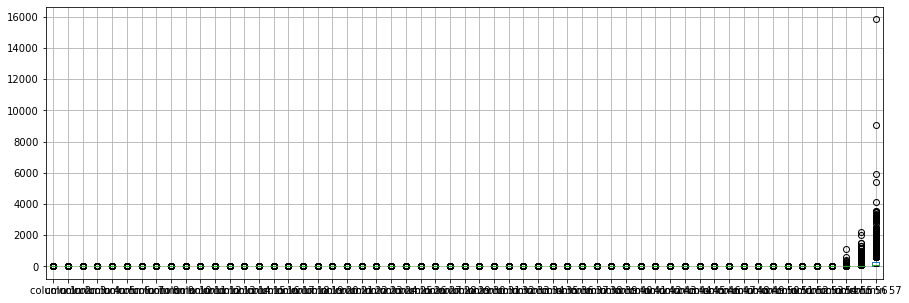

In [68]:
df.boxplot(return_type='axes', figsize=(15,5))

In [69]:
df.mean()

column 1       0.104937
column 2       0.222656
column 3       0.282555
column 4       0.063248
column 5       0.311713
column 6       0.094948
column 7       0.113375
column 8       0.108306
column 9       0.086300
column 10      0.237418
column 11      0.060133
column 12      0.541324
column 13      0.092879
column 14      0.059109
column 15      0.048682
column 16      0.256672
column 17      0.142779
column 18      0.187616
column 19      1.684137
column 20      0.088460
column 21      0.820367
column 22      0.124207
column 23      0.099928
column 24      0.091043
column 25      0.550839
column 26      0.270475
column 27      0.773720
column 28      0.117982
column 29      0.100913
column 30      0.109879
column 31      0.066196
column 32      0.047076
column 33      0.098888
column 34      0.051584
column 35      0.107203
column 36      0.095570
column 37      0.140580
column 38      0.013355
column 39      0.081018
column 40      0.067750
column 41      0.043975
column 42      0

In [70]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.032066,0.071564,0.030643,0.025715,0.057799,-0.002329,-0.003780,0.102918,0.035930,...,-0.019631,-0.033706,-0.016753,-0.038553,0.049524,0.134674,-0.009549,0.043469,0.099413,0.088244
column 2,-0.032066,1.000000,-0.035759,-0.006215,-0.026514,-0.024280,0.004243,-0.017250,-0.003007,0.038728,...,-0.015929,-0.002575,-0.054896,-0.017400,-0.015498,-0.007057,-0.003130,0.009802,0.008436,-0.022649
column 3,0.071564,-0.035759,1.000000,-0.020191,0.081130,0.083814,0.035222,0.007211,0.088840,0.034418,...,-0.030260,-0.032651,-0.007528,-0.032055,0.109676,0.101371,-0.000695,0.071274,0.146964,0.075451
column 4,0.030643,-0.006215,-0.020191,1.000000,0.005533,-0.008467,0.020800,0.010122,0.008702,-0.006039,...,-0.004432,-0.002190,-0.010006,-0.005337,-0.002885,0.009848,-0.001394,0.003786,0.034179,0.009829
column 5,0.025715,-0.026514,0.081130,0.005533,1.000000,0.057585,0.139101,0.023346,0.019661,0.034501,...,-0.031020,-0.035584,-0.047443,-0.024277,0.020871,0.040623,0.002350,0.038160,0.070885,0.000944
column 6,0.057799,-0.024280,0.083814,-0.008467,0.057585,1.000000,0.065448,0.069357,0.106020,0.007604,...,-0.031534,-0.013075,-0.012383,-0.008567,0.050182,0.077027,0.021346,-0.005704,0.139975,0.092446
column 7,-0.002329,0.004243,0.035222,0.020800,0.139101,0.065448,1.000000,0.029785,0.023199,0.046391,...,-0.032144,-0.031392,-0.059987,-0.026565,0.050132,0.089619,0.042103,0.030080,0.084619,-0.007212
column 8,-0.003780,-0.017250,0.007211,0.010122,0.023346,0.069357,0.029785,1.000000,0.093904,0.070864,...,-0.019982,-0.027709,-0.032573,-0.018705,0.035293,0.058529,-0.009500,0.010112,0.054454,0.046817
column 9,0.102918,-0.003007,0.088840,0.008702,0.019661,0.106020,0.023199,0.093904,1.000000,0.109453,...,-0.026642,-0.016711,-0.034058,0.014548,0.040886,0.159093,-0.003025,0.083364,0.264107,0.265008
column 10,0.035930,0.038728,0.034418,-0.006039,0.034501,0.007604,0.046391,0.070864,0.109453,1.000000,...,-0.013583,0.017973,0.001665,0.010995,0.031834,0.063081,0.056527,0.062305,0.135745,0.092326


In [71]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [72]:
imputer = md.Midas(layer_structure = [17,17+178,17+178+178,17+178+178+178,17+178+178,17+178,17], vae_layer = False, seed = 1780)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 461.17305221291787
Epoch: 1 , loss: 458.307064468437
Epoch: 2 , loss: 457.3680311728022
Epoch: 3 , loss: 460.58503688586296
Epoch: 4 , loss: 459.41270531843765
Epoch: 5 , loss: 460.9216270845526
Epoch: 6 , loss: 454.1877619514067
Epoch: 7 , loss: 442.9270383190195
Epoch: 8 , loss: 391.6827709982204
Epoch: 9 , loss: 362.60907512757836
Epoch: 10 , loss: 354.5078154241582
Epoch: 11 , loss: 340.60567160682814
Epoch: 12 , loss: 328.7034222539709
Epoch: 13 , loss: 323.107883852118
Epoch: 14 , loss: 317.85667572287315
Epoch: 15 , loss: 306.37188101313257
Epoch: 16 , loss: 313.6640517603645
Epoch: 17 , loss: 299.6235396488203
Epoch: 18 , loss: 310.7244708363603
Epoch: 19 , loss: 310.95068678374076
Epoch: 20 , loss: 303.693532392123
Epoch: 21 , loss: 298.78278530267056
Epoch: 22 , loss: 319.8452710008787
Epoch: 23 , loss: 293.66666906802084
Epoch: 24 , loss: 309.37520102258344
Epoch: 25 , loss: 304.923352005589

In [73]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [74]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.067963
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.044125
column 9      0.000000
column 10     0.123545
column 11     0.028940
column 12     0.000000
column 13     0.046948
column 14     0.000000
column 15     0.012377
column 16     0.151297
column 17     0.060782
column 18     0.000000
column 19     0.000000
column 20     0.023575
column 21     0.643940
column 22     0.000000
column 23     0.025458
column 24     0.038279
column 25     0.000000
column 26     0.146917
column 27     0.000000
column 28     0.000000
column 29     0.029527
column 30     0.035517
column 31     0.000000
column 32     0.014763
column 33     0.000000
column 34     0.008996
column 35     0.037007
column 36     0.044964
column 37     0.000000
column 38     0.004525
column 39     0.000000
column 40     0.025875
column 41     0.000000
column 42     0.000000
column 43     0.020839
column 44  

In [75]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [76]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.250765,0.000000,1.500351,0.0,0.000000,1.024798,-0.839678,...,0.0,0.138541,0.116200,0.000000,0.0,-0.004882,-0.272322,-2.493153,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.114528,0.0,0.138432,-1.535951,0.000000,0.0,0.000000,0.196385,0.000000,...,0.0,-0.002148,-0.042643,-0.053474,0.0,0.000000,0.010549,-0.530494,3.862165,0.0
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4593,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4594,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4595,-0.136803,0.000000,0.0,0.000000,0.000000,-0.109525,0.0,0.030905,0.008469,0.000000,...,0.0,0.172080,0.083631,0.006728,0.0,-0.013555,-0.091362,1.124692,10.440613,0.0


Calculating NRMSE Value

In [77]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [78]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [79]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

26303.984249895817

In [80]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [81]:
NRMS=numerator/denominator
NRMS


0.5542505360655016

In [82]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [83]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.000000,0.640000,0.64,0.000000,0.320000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.778,0.000000,0.000000,3.756000,61.000000,278.0
1,0.210000,0.280000,0.50,0.250765,0.140000,1.780351,0.21,0.070000,1.024798,0.100322,...,0.0,0.138541,0.248200,0.000000,0.372,0.175118,-0.224322,2.620847,101.000000,1028.0
2,0.000000,0.000000,0.00,0.000000,0.630000,0.000000,0.31,0.630000,0.310000,0.630000,...,0.0,0.000000,0.135000,0.000000,0.135,0.000000,0.000000,3.537000,40.000000,191.0
3,0.000000,0.114528,0.00,0.138432,0.314049,0.000000,0.00,1.850000,0.196385,0.000000,...,0.0,-0.002148,0.180357,-0.053474,0.000,0.000000,0.010549,2.469506,18.862165,54.0
4,0.000000,0.000000,0.00,0.000000,1.920000,0.000000,0.00,0.000000,0.000000,0.640000,...,0.0,0.000000,0.054000,0.000000,0.164,0.054000,0.000000,1.671000,4.000000,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.000000,0.000000,0.64,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.348000,0.000000,1.160,0.000000,0.000000,3.121000,15.000000,103.0
4593,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,3.043000,15.000000,70.0
4594,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.0,0.000000,0.136000,0.000000,0.000,0.000000,0.409000,1.837000,12.000000,68.0
4595,0.033197,0.000000,0.68,0.000000,0.340000,0.230475,0.00,0.030905,0.008469,0.000000,...,0.0,0.172080,0.115631,0.006728,0.065,-0.013555,-0.091362,2.313692,15.440613,69.0


In [84]:
imputations[-1].to_excel("Spam_AL_20(imp).xlsx", index=False, header=False)